In [95]:
from sklearn.datasets import load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
bank = pd.read_csv('bank.csv', sep=';')
print(bank.columns)

wine = pd.read_csv('winequality-red.csv', sep=';')
print(wine.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [97]:
print("Bank:\n", bank.head())
print("\nWine:\n",wine.head())

Bank:
    age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Wine:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4  

In [98]:
le = LabelEncoder()

# bank.csv
bank = bank.copy()
for col in bank.columns:
    if bank[col].dtype == 'object':
        bank[col] = le.fit_transform(bank[col])

print("Bank after encoding:\n",bank.head())

x_bank = bank.drop('y', axis=1)
y_bank = bank['y']

# wine.csv
x_wine = wine.drop('quality', axis=1)
y_wine = wine['quality'] 

Bank after encoding:
    age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   30    4        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1     -1         0         3  0  
1   11      8       220         1    339         4         0  0  
2   16      0       185         1    330         1         0  0  
3    3      6       199         4     -1         0         3  0  
4    5      8       226         1     -1         0         3  0  


In [99]:
xb_train, xb_test, yb_train, yb_test = train_test_split(x_bank, y_bank, test_size=0.2, random_state=0)
xw_train, xw_test, yw_train, yw_test = train_test_split(x_wine, y_wine, test_size=0.2, random_state=0)

In [100]:
# Bank Dataset
dt_gini_bank = DecisionTreeClassifier(criterion='gini', random_state=0)
dt_gini_bank.fit(xb_train, yb_train)
yb_pred_gini = dt_gini_bank.predict(xb_test)

bank_train_gini = accuracy_score(yb_train, dt_gini_bank.predict(xb_train))
bank_test_gini = accuracy_score(yb_test, yb_pred_gini)

# Wine Dataset
dt_gini_wine = DecisionTreeClassifier(criterion='gini', random_state=0)
dt_gini_wine.fit(xw_train, yw_train)
yw_pred_gini = dt_gini_wine.predict(xw_test)

wine_train_gini = accuracy_score(yw_train, dt_gini_wine.predict(xw_train))
wine_test_gini = accuracy_score(yw_test, yw_pred_gini)


In [101]:
# Bank Dataset
dt_gini_prune_bank = DecisionTreeClassifier(criterion='gini', random_state=0, ccp_alpha=0.015)
dt_gini_prune_bank.fit(xb_train, yb_train)
yb_pred_gini_prune = dt_gini_prune_bank.predict(xb_test)

bank_train_gini_prune = accuracy_score(yb_train, dt_gini_prune_bank.predict(xb_train))
bank_test_gini_prune = accuracy_score(yb_test, yb_pred_gini_prune)

# Wine Dataset
dt_gini_prune_wine = DecisionTreeClassifier(criterion='gini', random_state=0, ccp_alpha=0.015)
dt_gini_prune_wine.fit(xw_train, yw_train)
yw_pred_gini_prune = dt_gini_prune_wine.predict(xw_test)

wine_train_gini_prune = accuracy_score(yw_train, dt_gini_prune_wine.predict(xw_train))
wine_test_gini_prune = accuracy_score(yw_test, yw_pred_gini_prune)


In [102]:
# Bank Dataset
dt_entropy_bank = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_entropy_bank.fit(xb_train, yb_train)
yb_pred_entropy = dt_entropy_bank.predict(xb_test)

bank_train_entropy = accuracy_score(yb_train, dt_entropy_bank.predict(xb_train))
bank_test_entropy = accuracy_score(yb_test, yb_pred_entropy)

# Wine Dataset
dt_entropy_wine = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_entropy_wine.fit(xw_train, yw_train)
yw_pred_entropy = dt_entropy_wine.predict(xw_test)

wine_train_entropy = accuracy_score(yw_train, dt_entropy_wine.predict(xw_train))
wine_test_entropy = accuracy_score(yw_test, yw_pred_entropy)


In [103]:
# Bank Dataset
dt_entropy_prune_bank = DecisionTreeClassifier(criterion='entropy', random_state=0, ccp_alpha=0.015)
dt_entropy_prune_bank.fit(xb_train, yb_train)
yb_pred_entropy_prune = dt_entropy_prune_bank.predict(xb_test)

bank_train_entropy_prune = accuracy_score(yb_train, dt_entropy_prune_bank.predict(xb_train))
bank_test_entropy_prune = accuracy_score(yb_test, yb_pred_entropy_prune)

# Wine Dataset
dt_entropy_prune_wine = DecisionTreeClassifier(criterion='entropy', random_state=0, ccp_alpha=0.015)
dt_entropy_prune_wine.fit(xw_train, yw_train)
yw_pred_entropy_prune = dt_entropy_prune_wine.predict(xw_test)

wine_train_entropy_prune = accuracy_score(yw_train, dt_entropy_prune_wine.predict(xw_train))
wine_test_entropy_prune = accuracy_score(yw_test, yw_pred_entropy_prune)

In [104]:
import pandas as pd

results = {
    'Model': ['DT Gini (no prune)', 'DT Gini (pruned)', 'DT Entropy (no prune)', 'DT Entropy (pruned)'],
    'Bank_Train': [bank_train_gini, bank_train_gini_prune, bank_train_entropy, bank_train_entropy_prune],
    'Bank_Test': [bank_test_gini, bank_test_gini_prune, bank_test_entropy, bank_test_entropy_prune],
    'Wine_Train': [wine_train_gini, wine_train_gini_prune, wine_train_entropy, wine_train_entropy_prune],
    'Wine_Test': [wine_test_gini, wine_test_gini_prune, wine_test_entropy, wine_test_entropy_prune]
}

df_results = pd.DataFrame(results)
print(df_results)


                   Model  Bank_Train  Bank_Test  Wine_Train  Wine_Test
0     DT Gini (no prune)    1.000000   0.870718    1.000000   0.693750
1       DT Gini (pruned)    0.887168   0.876243    0.548866   0.593750
2  DT Entropy (no prune)    1.000000   0.851934    1.000000   0.634375
3    DT Entropy (pruned)    0.887168   0.876243    0.587177   0.565625


In [105]:
# actual and predicted values
comparison_df = pd.DataFrame({
    'Actual Output': yw_test.values,
    'Predictions': yw_pred_entropy_prune
})

# correct and wrong predictions
correct = (comparison_df['Actual Output'] == comparison_df['Predictions']).sum()
wrong = len(comparison_df) - correct
total = len(comparison_df)

# Display first few rows
print("Actual vs Predicted (Entropy + Pruned, Wine Dataset)\n")
print(comparison_df.head(10))
print(f"\nCorrectly Predicted: {correct} out of {total}")
print(f"Wrong Predictions: {wrong} out of {total}")


Actual vs Predicted (Entropy + Pruned, Wine Dataset)

   Actual Output  Predictions
0              6            6
1              5            5
2              7            7
3              6            5
4              5            5
5              6            5
6              5            5
7              6            7
8              4            5
9              5            5

Correctly Predicted: 181 out of 320
Wrong Predictions: 139 out of 320


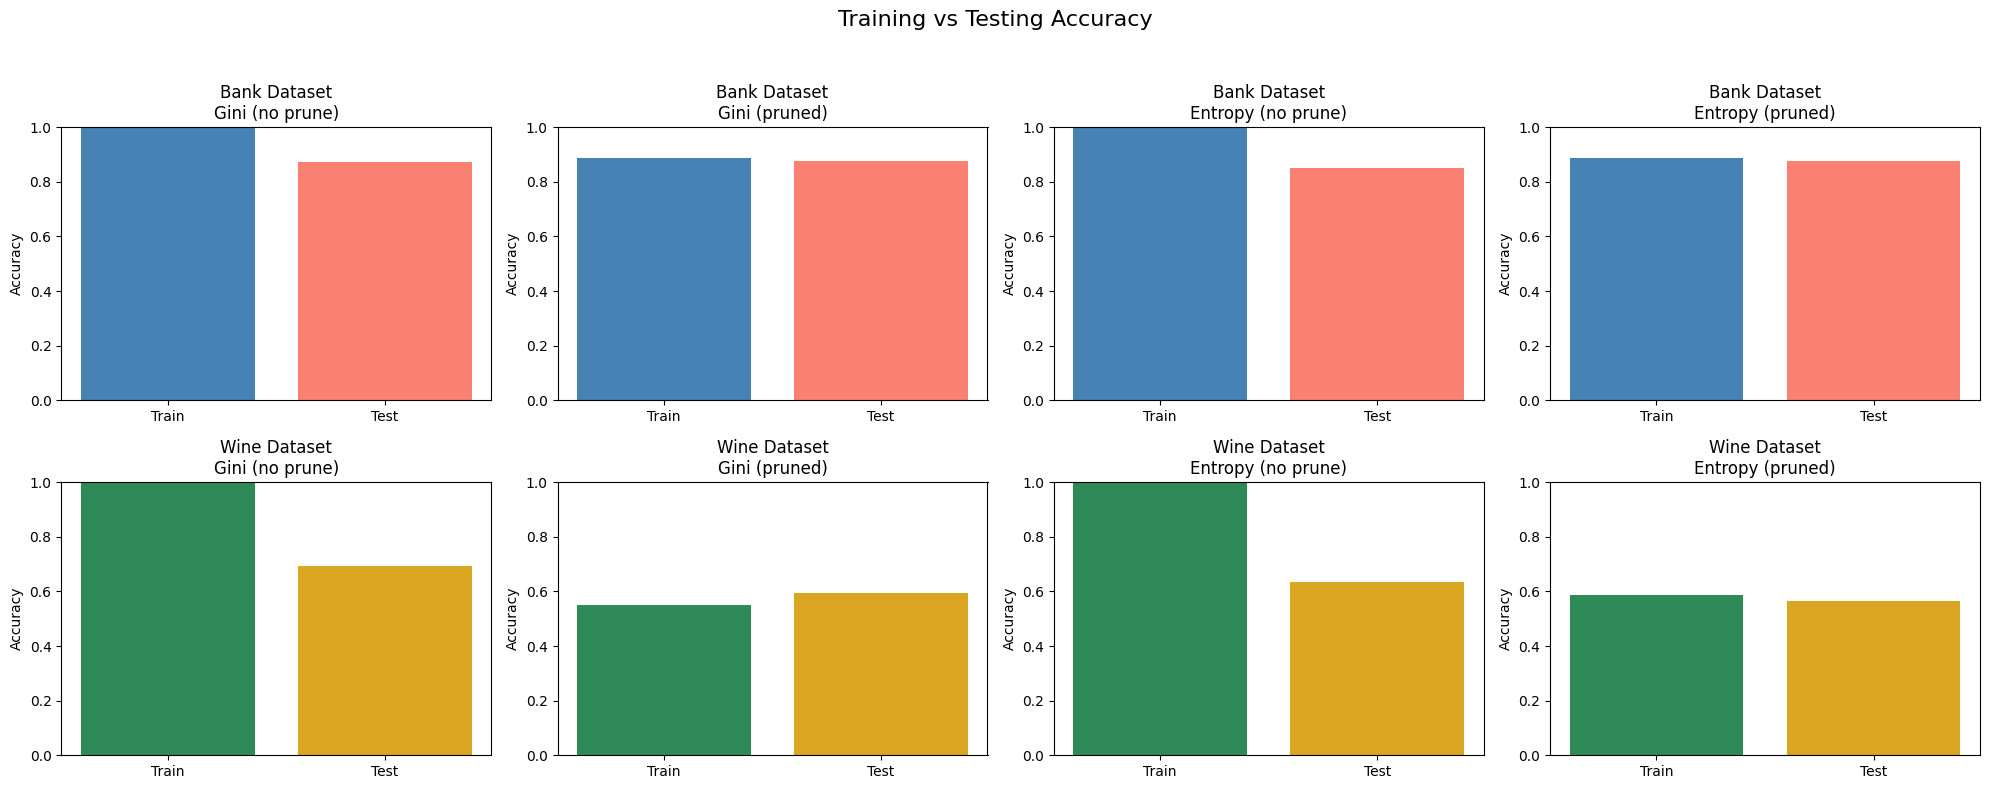

In [106]:
models = ['Gini (no prune)', 'Gini (pruned)', 'Entropy (no prune)', 'Entropy (pruned)']

bank_train = [bank_train_gini, bank_train_gini_prune, bank_train_entropy, bank_train_entropy_prune]
bank_test = [bank_test_gini, bank_test_gini_prune, bank_test_entropy, bank_test_entropy_prune]
wine_train = [wine_train_gini, wine_train_gini_prune, wine_train_entropy, wine_train_entropy_prune]
wine_test = [wine_test_gini, wine_test_gini_prune, wine_test_entropy, wine_test_entropy_prune]

fig, axs = plt.subplots(2, 4, figsize=(20, 8))
fig.suptitle('Training vs Testing Accuracy', fontsize=16)

# Plot Bank Dataset
for i in range(4):
    axs[0, i].bar(['Train', 'Test'], [bank_train[i], bank_test[i]], color=['steelblue', 'salmon'])
    axs[0, i].set_ylim(0, 1)
    axs[0, i].set_title(f'Bank Dataset\n{models[i]}')
    axs[0, i].set_ylabel('Accuracy')

# Plot Wine Dataset
for i in range(4):
    axs[1, i].bar(['Train', 'Test'], [wine_train[i], wine_test[i]], color=['seagreen', 'goldenrod'])
    axs[1, i].set_ylim(0, 1)
    axs[1, i].set_title(f'Wine Dataset\n{models[i]}')
    axs[1, i].set_ylabel('Accuracy')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
